In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
weather = pd.read_csv('weather.csv',index_col='Date')

In [3]:
weather

,Temp,pressure,humidity,wind speed,max temp,visibility,dewpoint temp
Date,,,,,,,
01.02.2005,17.0,764.4,48.0,2.0,19.2,2.0,6.0
02.02.2005,18.4,761.9,36.0,2.0,20.2,2.0,2.9
03.02.2005,20.0,760.7,36.0,0.0,22.0,2.0,4.3
04.02.2005,21.2,759.7,42.0,1.0,23.4,2.0,7.8
05.02.2005,20.2,760.2,54.0,1.0,23.8,1.0,10.7
...,...,...,...,...,...,...,...
06.10.2023,34.4,752.6,45.0,0.0,36.3,4.0,20.8
07.10.2023,33.6,754.1,50.0,1.0,35.5,4.0,21.9
08.10.2023,34.2,754.0,54.0,0.0,36.5,2.0,23.6


In [4]:
weather.describe()

,Temp,pressure,humidity,wind speed,max temp,visibility,dewpoint temp
count,6744.000000,6750.000000,6743.000000,6755.000000,6723.000000,6766.000000,6763.000000
mean,29.425000,754.240593,51.983094,1.994967,31.876365,2.257057,17.206876
std,7.213272,5.916589,19.500337,2.039724,6.767476,1.212007,6.674645
min,8.000000,730.400000,7.000000,0.000000,9.400000,0.050000,-8.700000
25%,23.800000,749.200000,38.000000,1.000000,27.100000,2.000000,12.100000
50%,30.600000,754.000000,52.000000,2.000000,33.400000,2.000000,16.800000
75%,34.800000,759.400000,65.000000,3.000000,36.600000,2.000000,23.700000
max,44.800000,824.800000,100.000000,49.000000,46.000000,55.000000,31.100000


In [5]:
weather.dtypes

Temp             float64
pressure         float64
humidity         float64
wind speed       float64
max temp         float64
visibility       float64
dewpoint temp    float64
dtype: object

In [6]:
weather.isnull().sum()

Temp             22
pressure         16
humidity         23
wind speed       11
max temp         43
visibility        0
dewpoint temp     3
dtype: int64

In [7]:
df = weather.fillna(weather.mean(numeric_only=True))

In [8]:
df.isnull().sum()

Temp             0
pressure         0
humidity         0
wind speed       0
max temp         0
visibility       0
dewpoint temp    0
dtype: int64

In [9]:
df

,Temp,pressure,humidity,wind speed,max temp,visibility,dewpoint temp
Date,,,,,,,
01.02.2005,17.0,764.4,48.0,2.0,19.2,2.0,6.0
02.02.2005,18.4,761.9,36.0,2.0,20.2,2.0,2.9
03.02.2005,20.0,760.7,36.0,0.0,22.0,2.0,4.3
04.02.2005,21.2,759.7,42.0,1.0,23.4,2.0,7.8
05.02.2005,20.2,760.2,54.0,1.0,23.8,1.0,10.7
...,...,...,...,...,...,...,...
06.10.2023,34.4,752.6,45.0,0.0,36.3,4.0,20.8
07.10.2023,33.6,754.1,50.0,1.0,35.5,4.0,21.9
08.10.2023,34.2,754.0,54.0,0.0,36.5,2.0,23.6


In [10]:
df.index

Index(['01.02.2005 ', '02.02.2005 ', '03.02.2005 ', '04.02.2005 ',
       '05.02.2005 ', '06.02.2005 ', '07.02.2005 ', '08.02.2005 ',
       '09.02.2005 ', '10.02.2005 ',
       ...
       '01.10.2023 ', '02.10.2023 ', '03.10.2023 ', '04.10.2023 ',
       '05.10.2023 ', '06.10.2023 ', '07.10.2023 ', '08.10.2023 ',
       '09.10.2023 ', '10.10.2023 '],
      dtype='object', name='Date', length=6766)

In [11]:
df.index = df.index.str.strip()
df.index = pd.to_datetime(df.index, format='%d.%m.%Y')

In [12]:
df.index

DatetimeIndex(['2005-02-01', '2005-02-02', '2005-02-03', '2005-02-04',
               '2005-02-05', '2005-02-06', '2005-02-07', '2005-02-08',
               '2005-02-09', '2005-02-10',
               ...
               '2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04',
               '2023-10-05', '2023-10-06', '2023-10-07', '2023-10-08',
               '2023-10-09', '2023-10-10'],
              dtype='datetime64[ns]', name='Date', length=6766, freq=None)

In [13]:
df.index.year.value_counts().sort_index()

2005    326
2006    363
2007    359
2008    355
2009    352
2010    361
2011    359
2012    365
2013    364
2014    365
2015    363
2016    366
2017    365
2018    364
2019    364
2020    364
2021    365
2022    364
2023    282
Name: Date, dtype: int64

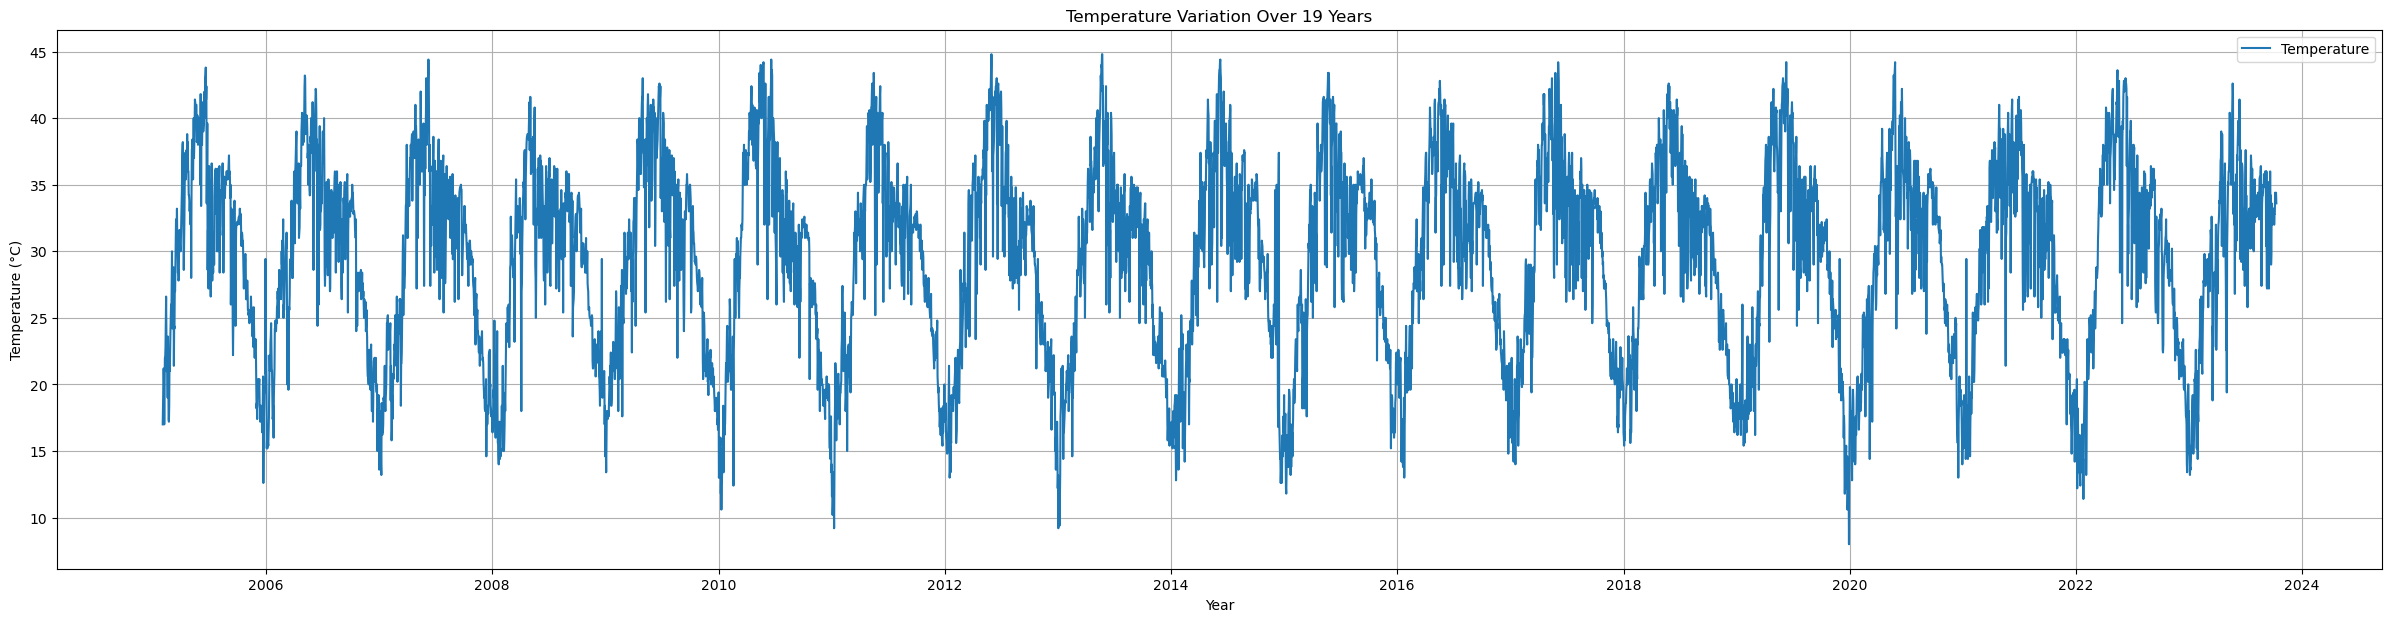

In [14]:
plt.figure(figsize=(30, 7))
plt.plot(df.index, df['Temp'], label='Temperature')
plt.title('Temperature Variation Over 19 Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

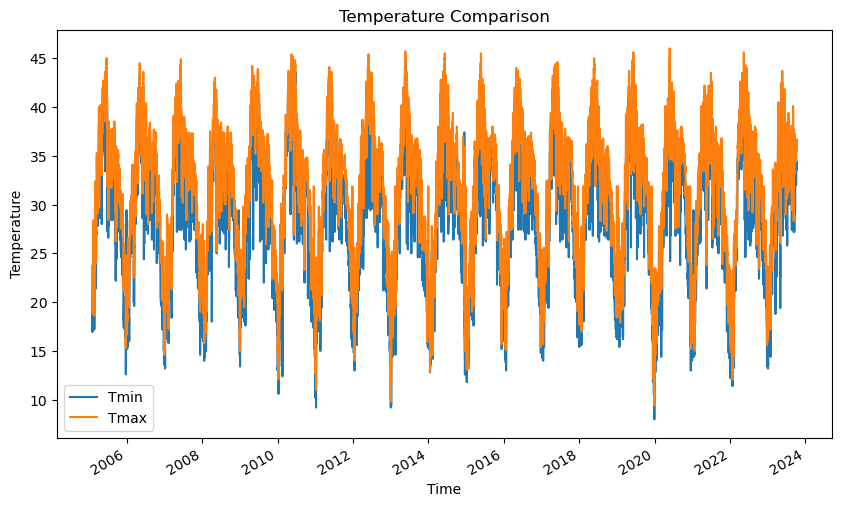

In [15]:
df[["Temp", "max temp"]].plot(figsize=(10,6))

plt.title('Temperature Comparison')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.legend(['Tmin', 'Tmax'])

plt.show()

In [16]:
df['target'] = df.shift(-1)["Temp"]

In [17]:
df

,Temp,pressure,humidity,wind speed,max temp,visibility,dewpoint temp,target
Date,,,,,,,,
2005-02-01,17.0,764.4,48.0,2.0,19.2,2.0,6.0,18.4
2005-02-02,18.4,761.9,36.0,2.0,20.2,2.0,2.9,20.0
2005-02-03,20.0,760.7,36.0,0.0,22.0,2.0,4.3,21.2
2005-02-04,21.2,759.7,42.0,1.0,23.4,2.0,7.8,20.2
2005-02-05,20.2,760.2,54.0,1.0,23.8,1.0,10.7,17.0
...,...,...,...,...,...,...,...,...
2023-10-06,34.4,752.6,45.0,0.0,36.3,4.0,20.8,33.6
2023-10-07,33.6,754.1,50.0,1.0,35.5,4.0,21.9,34.2
2023-10-08,34.2,754.0,54.0,0.0,36.5,2.0,23.6,34.4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


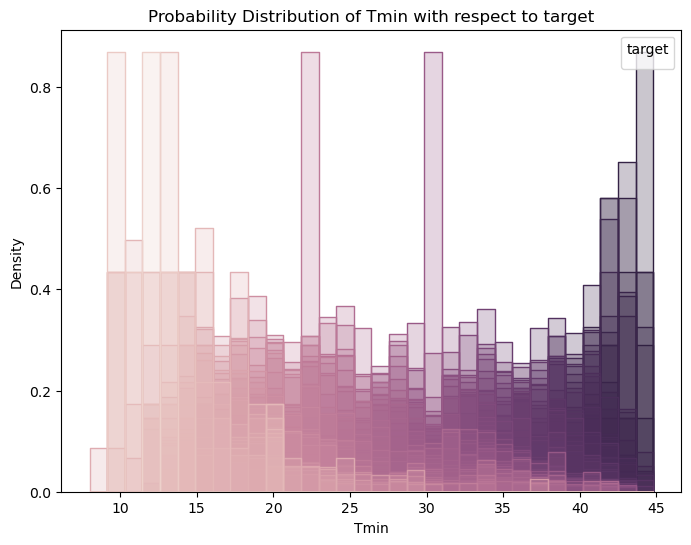

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


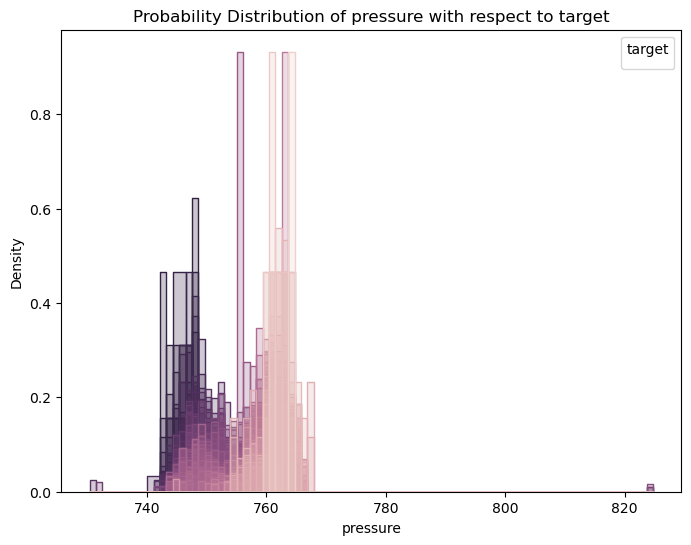

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


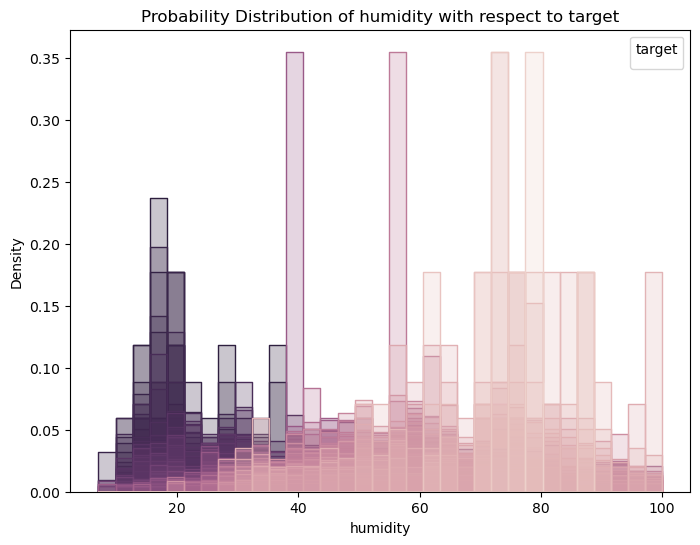

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


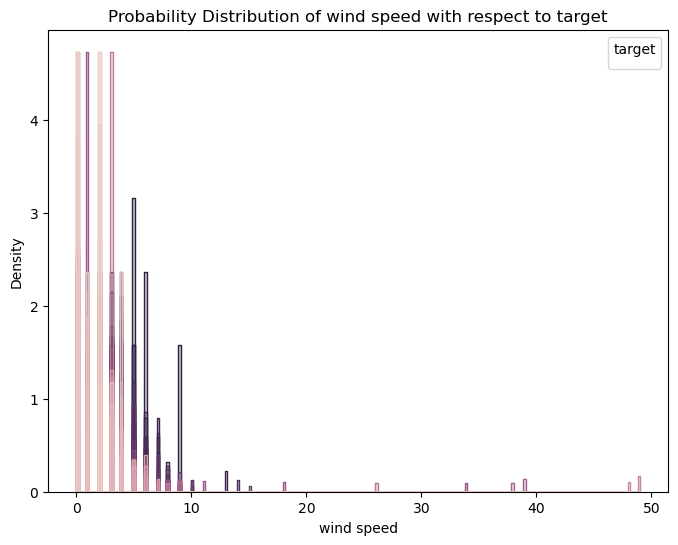

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


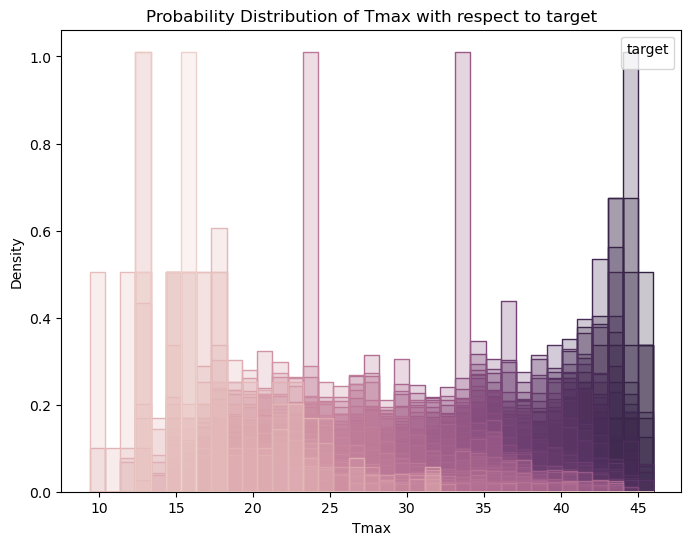

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


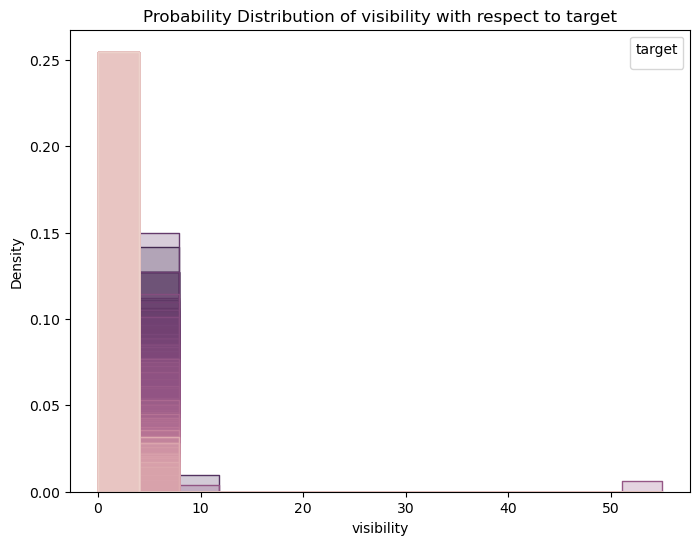

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


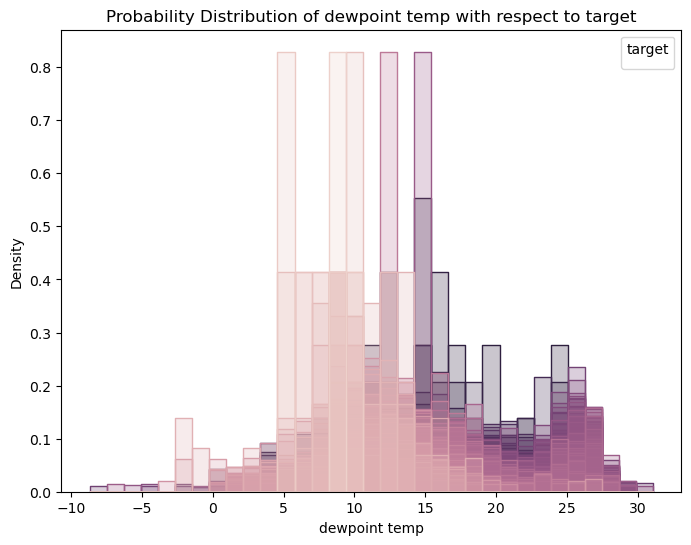

In [36]:
# Assuming you have a DataFrame called 'data' with columns representing parameters and the target variable
# Replace 'data' with your actual DataFrame

target_variable = 'target'  # Replace 'target_variable' with the name of your target variable

# Plotting the probability distribution for each parameter with respect to the target variable
for column in df.columns:
    if column != target_variable:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, hue=target_variable, element="step", stat="density", common_norm=False)
        plt.title(f'Probability Distribution of {column} with respect to {target_variable}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.legend(title=target_variable)
        plt.show()


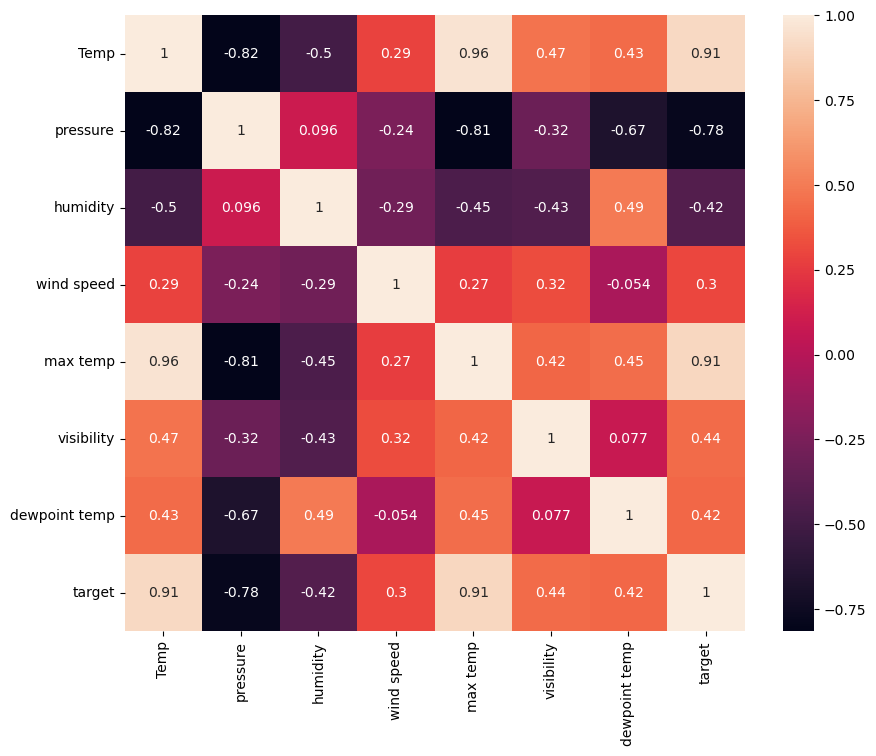

In [19]:
corrmat = df.corr(method = "spearman",numeric_only=True)
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [20]:
df.rename(columns={'Temp': 'Tmin'}, inplace=True)

In [21]:
df.rename(columns={'max temp': 'Tmax'}, inplace=True)

In [22]:
df.dropna(subset=['target'], inplace=True)

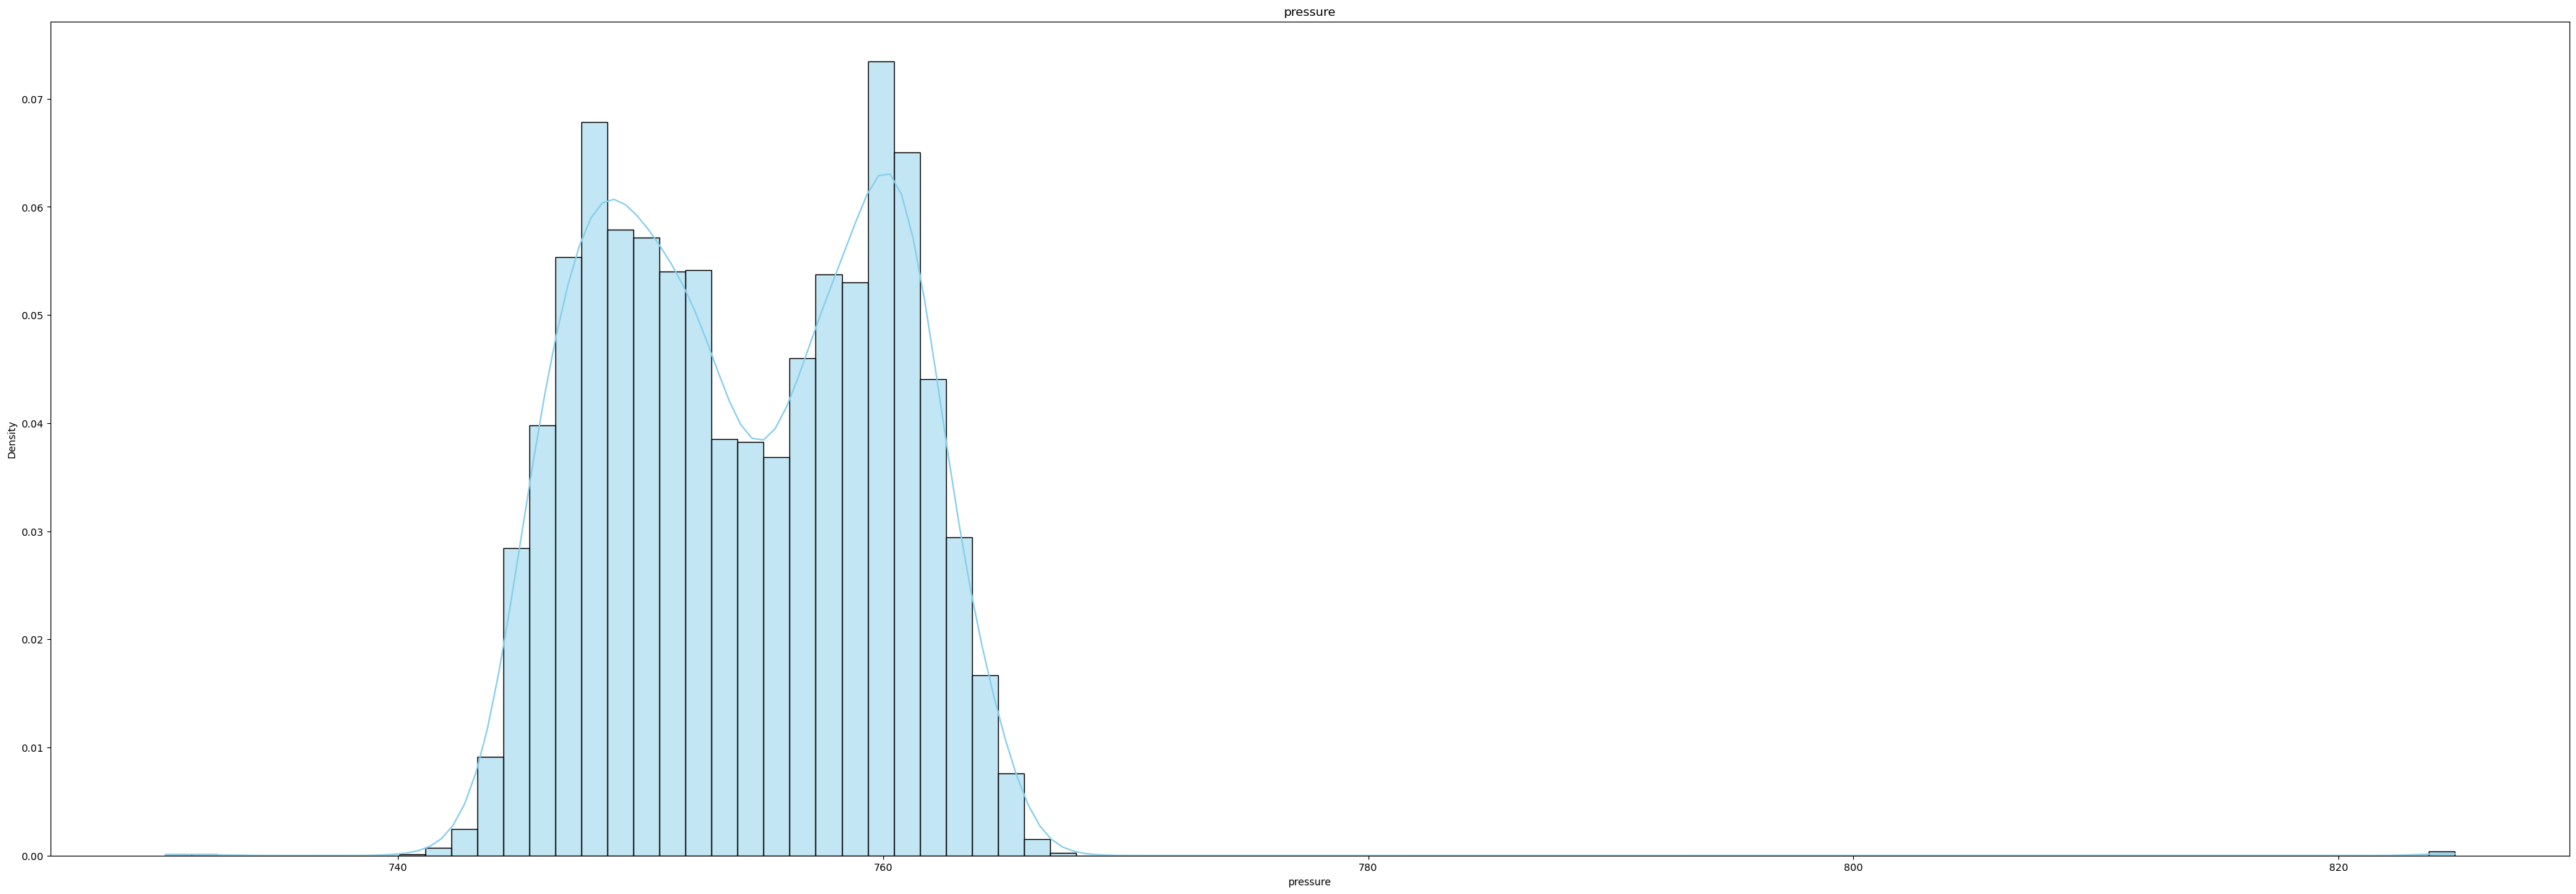

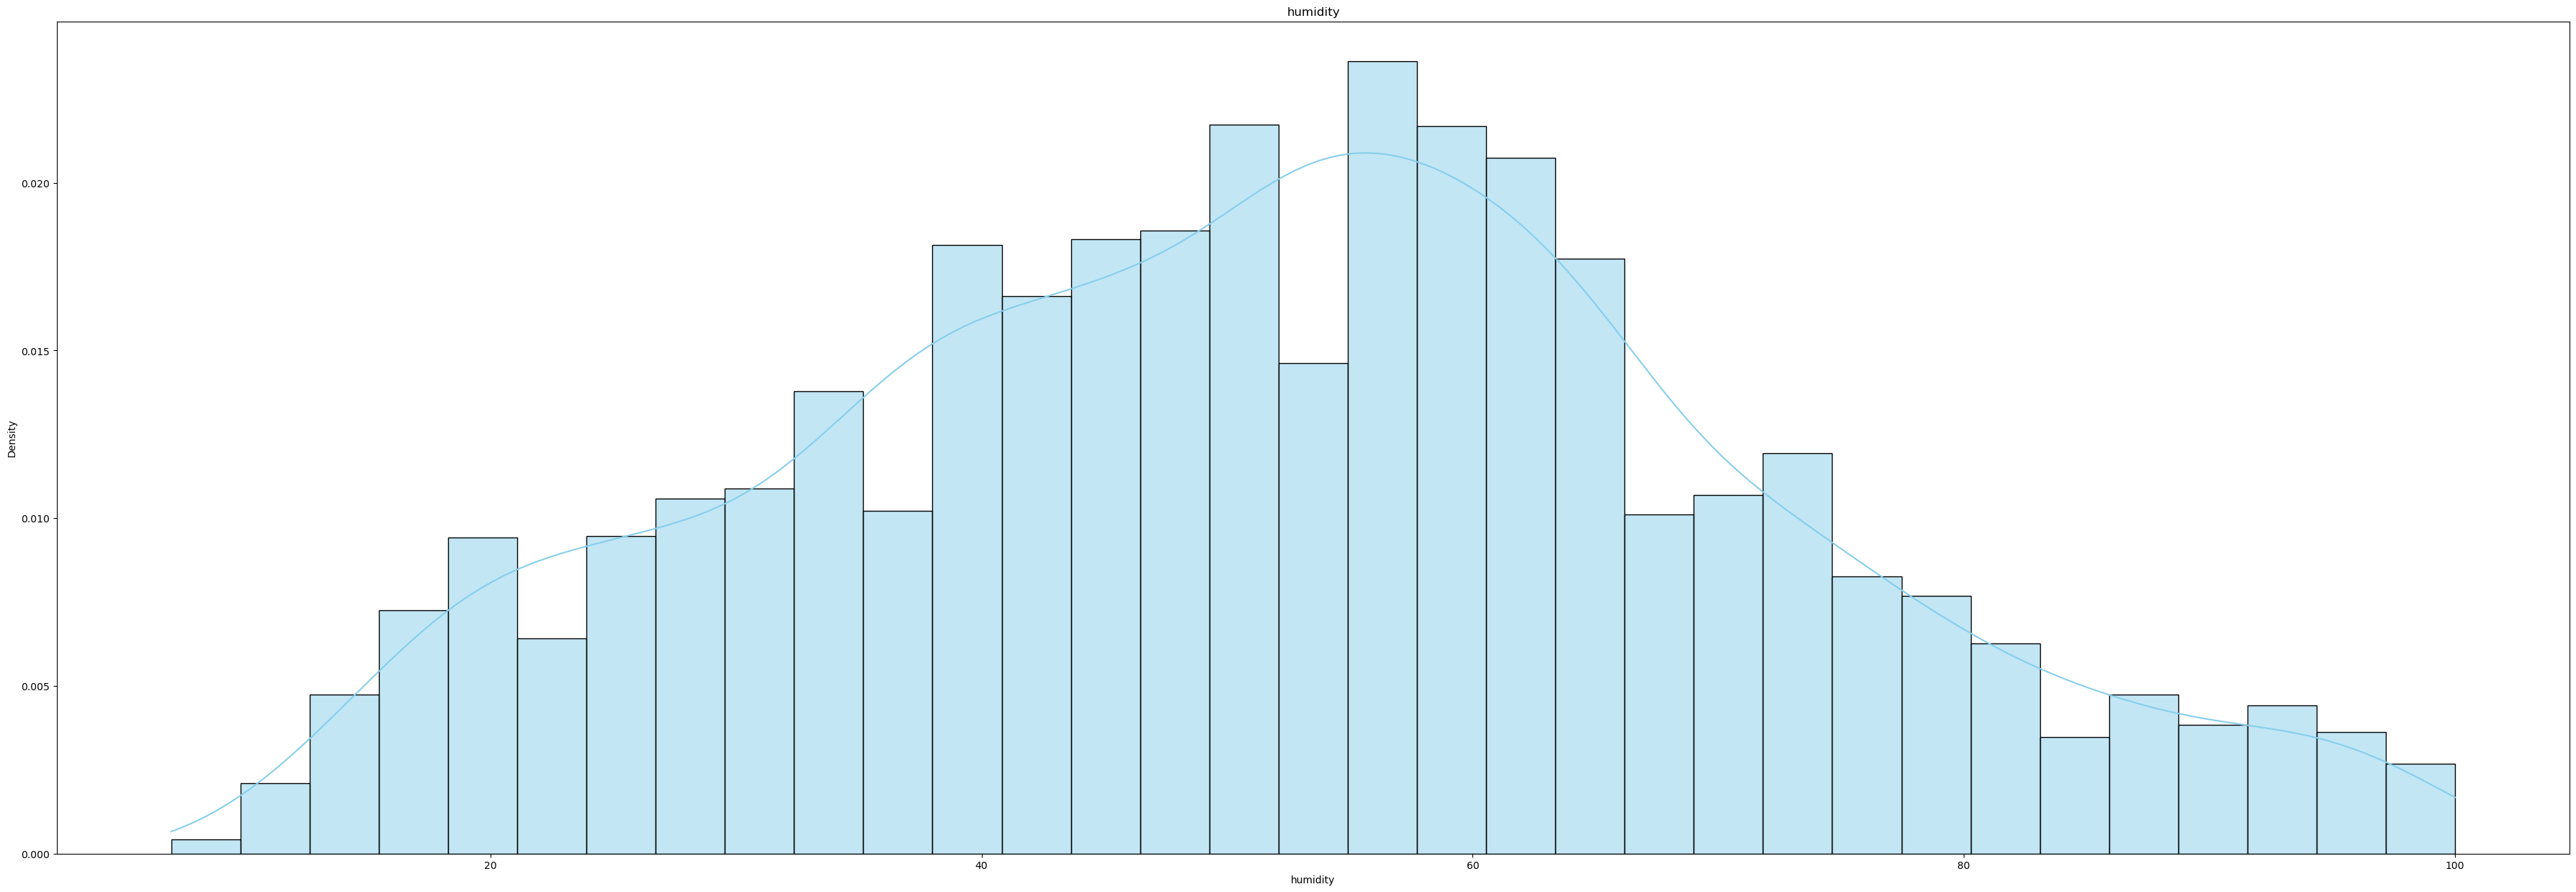

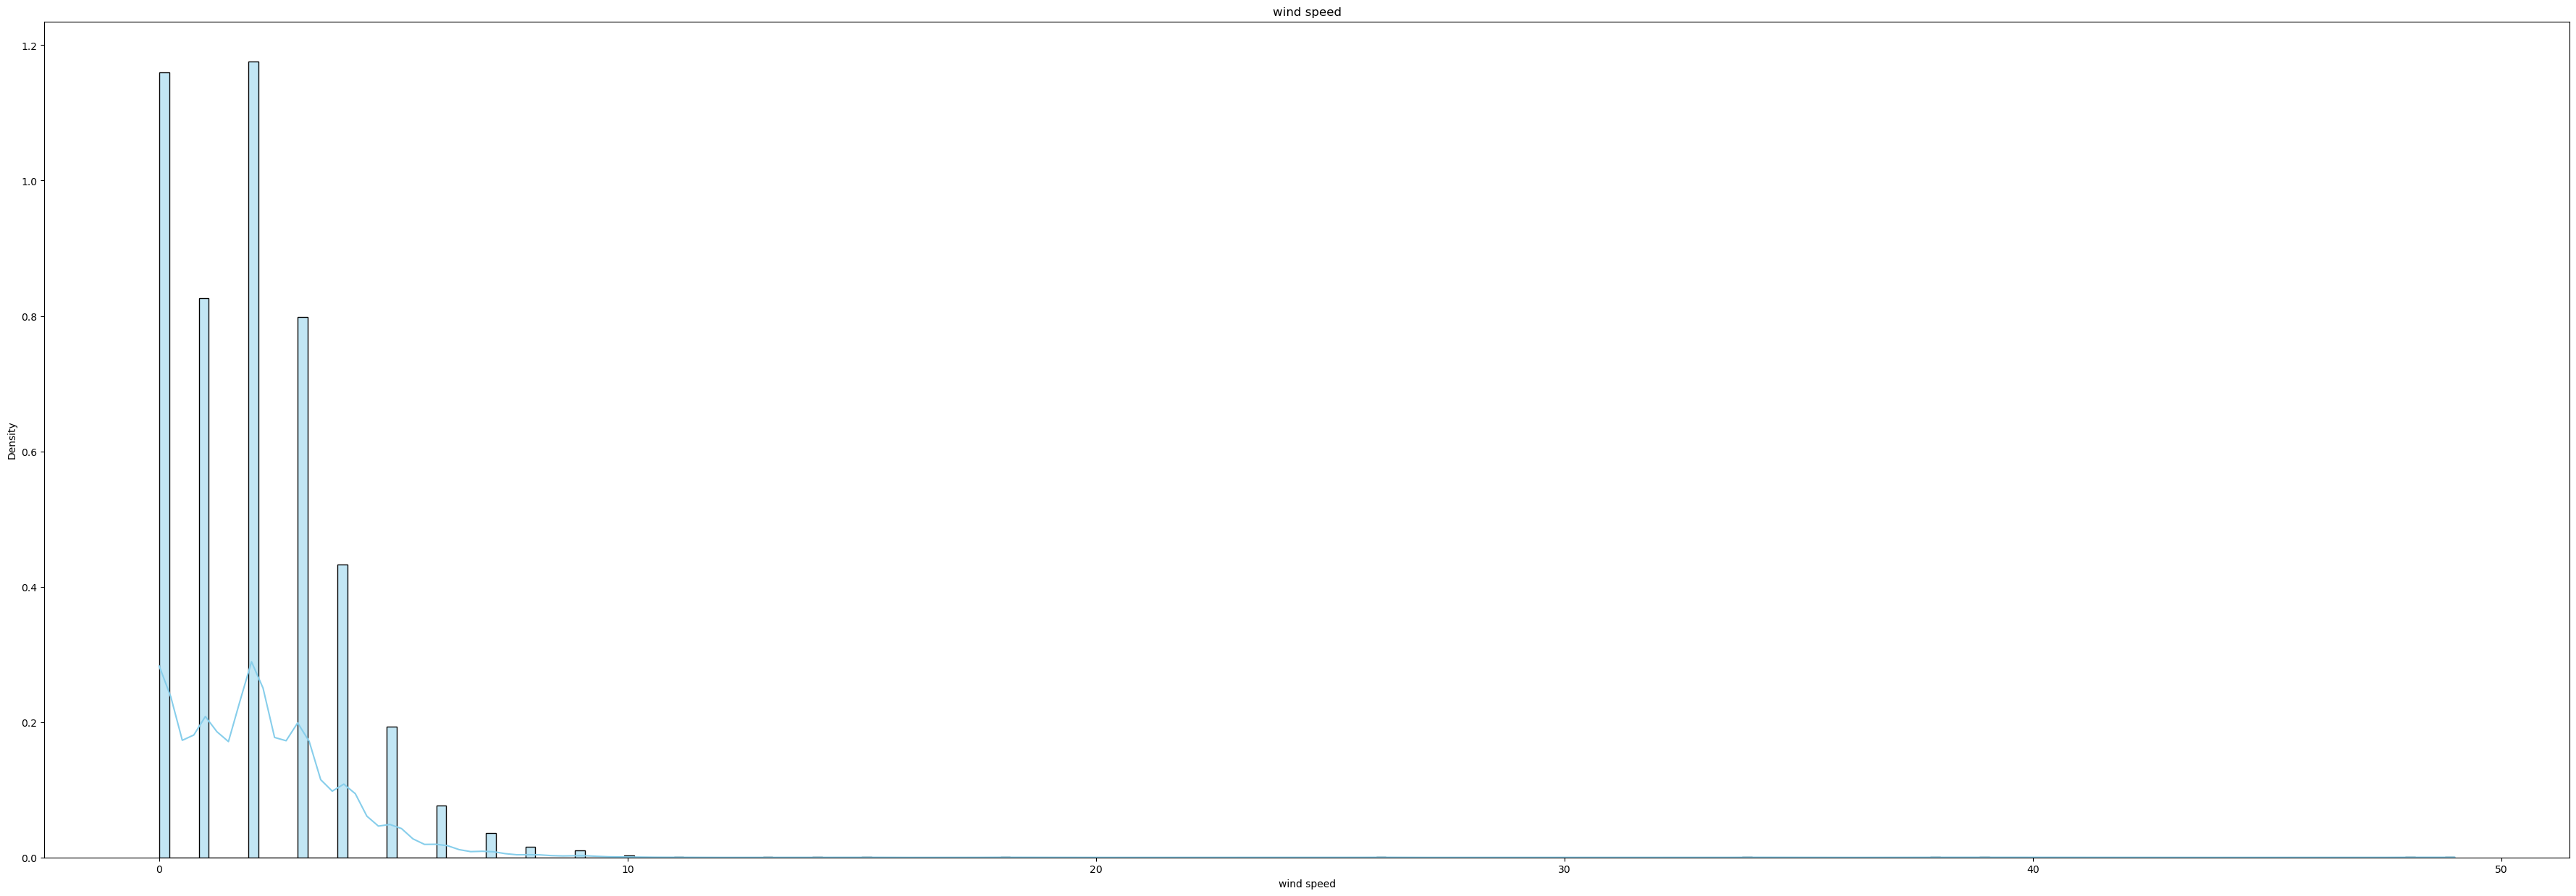

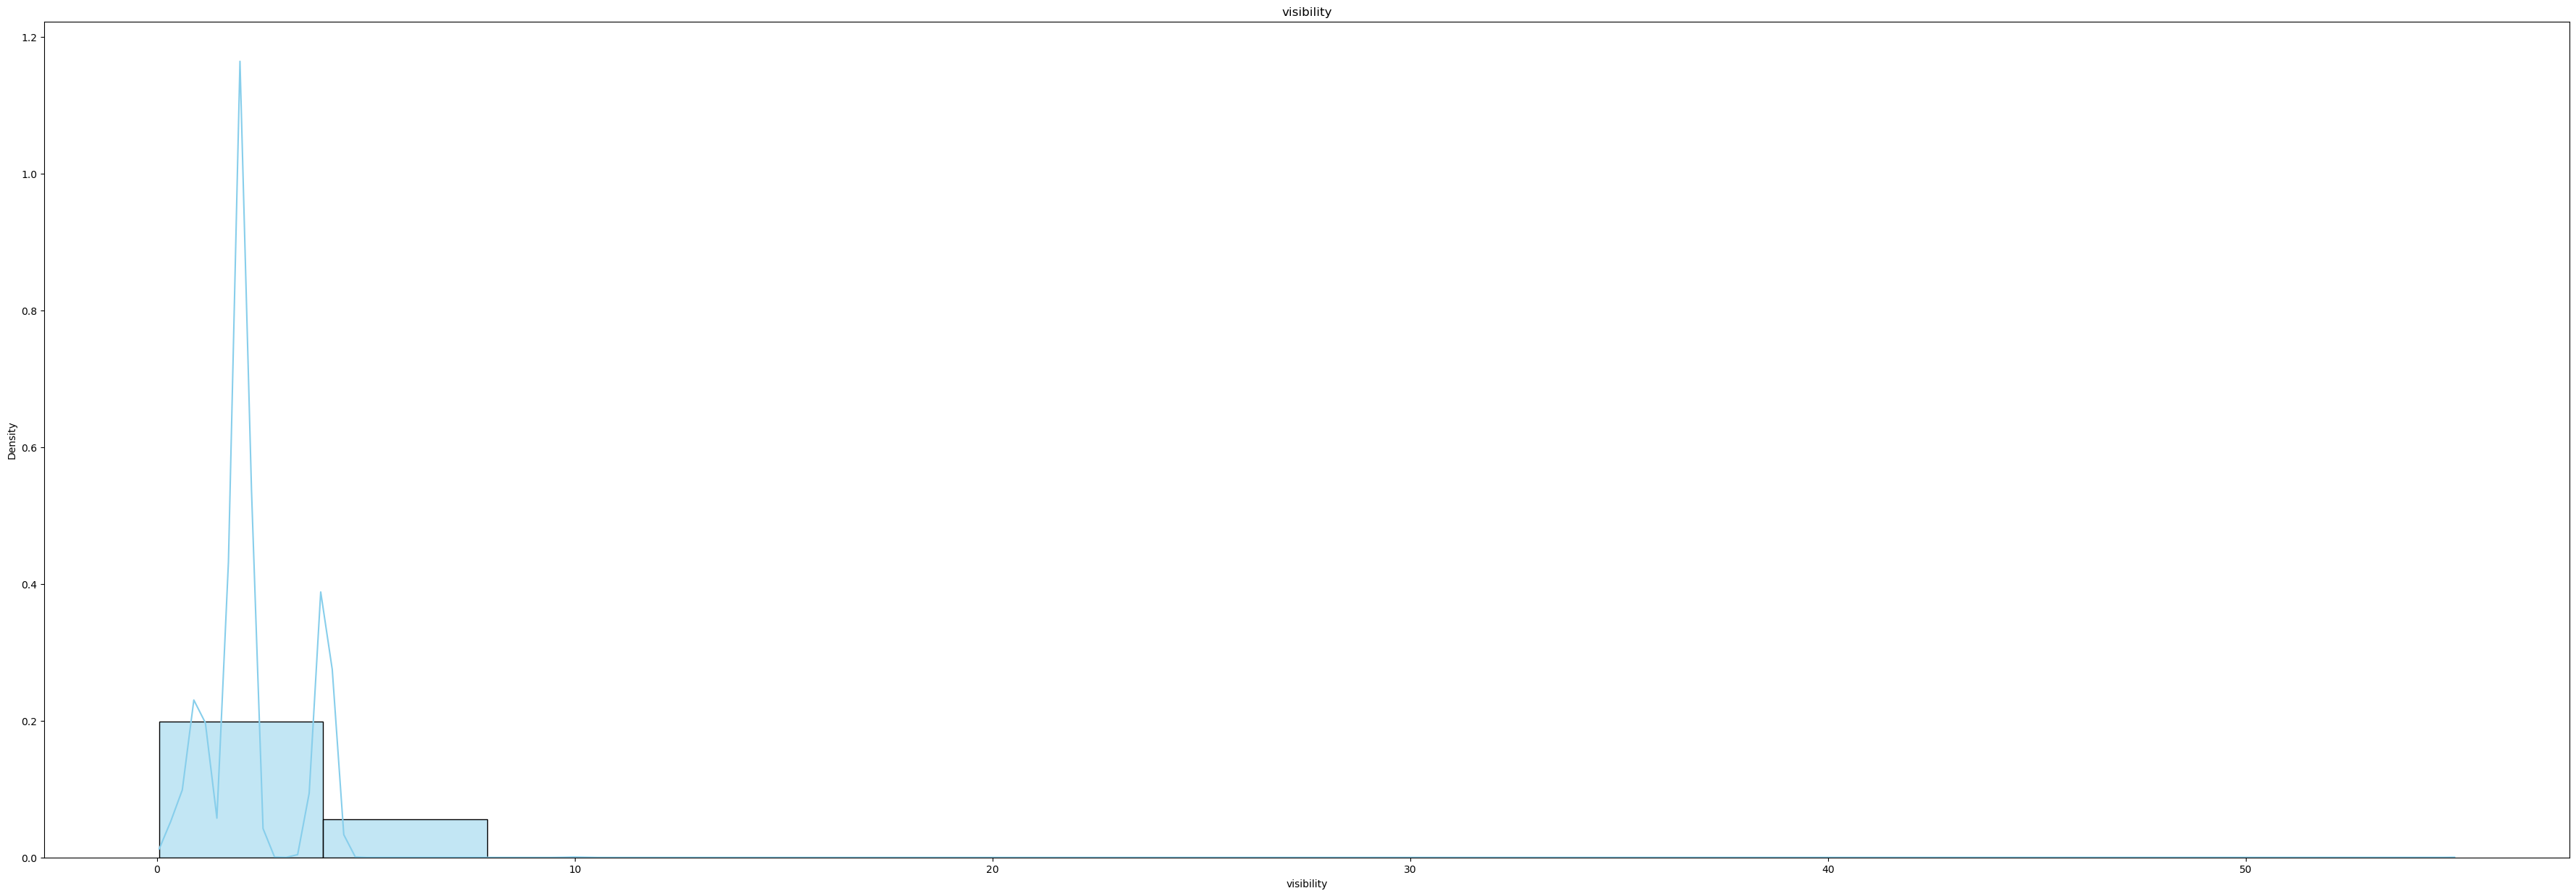

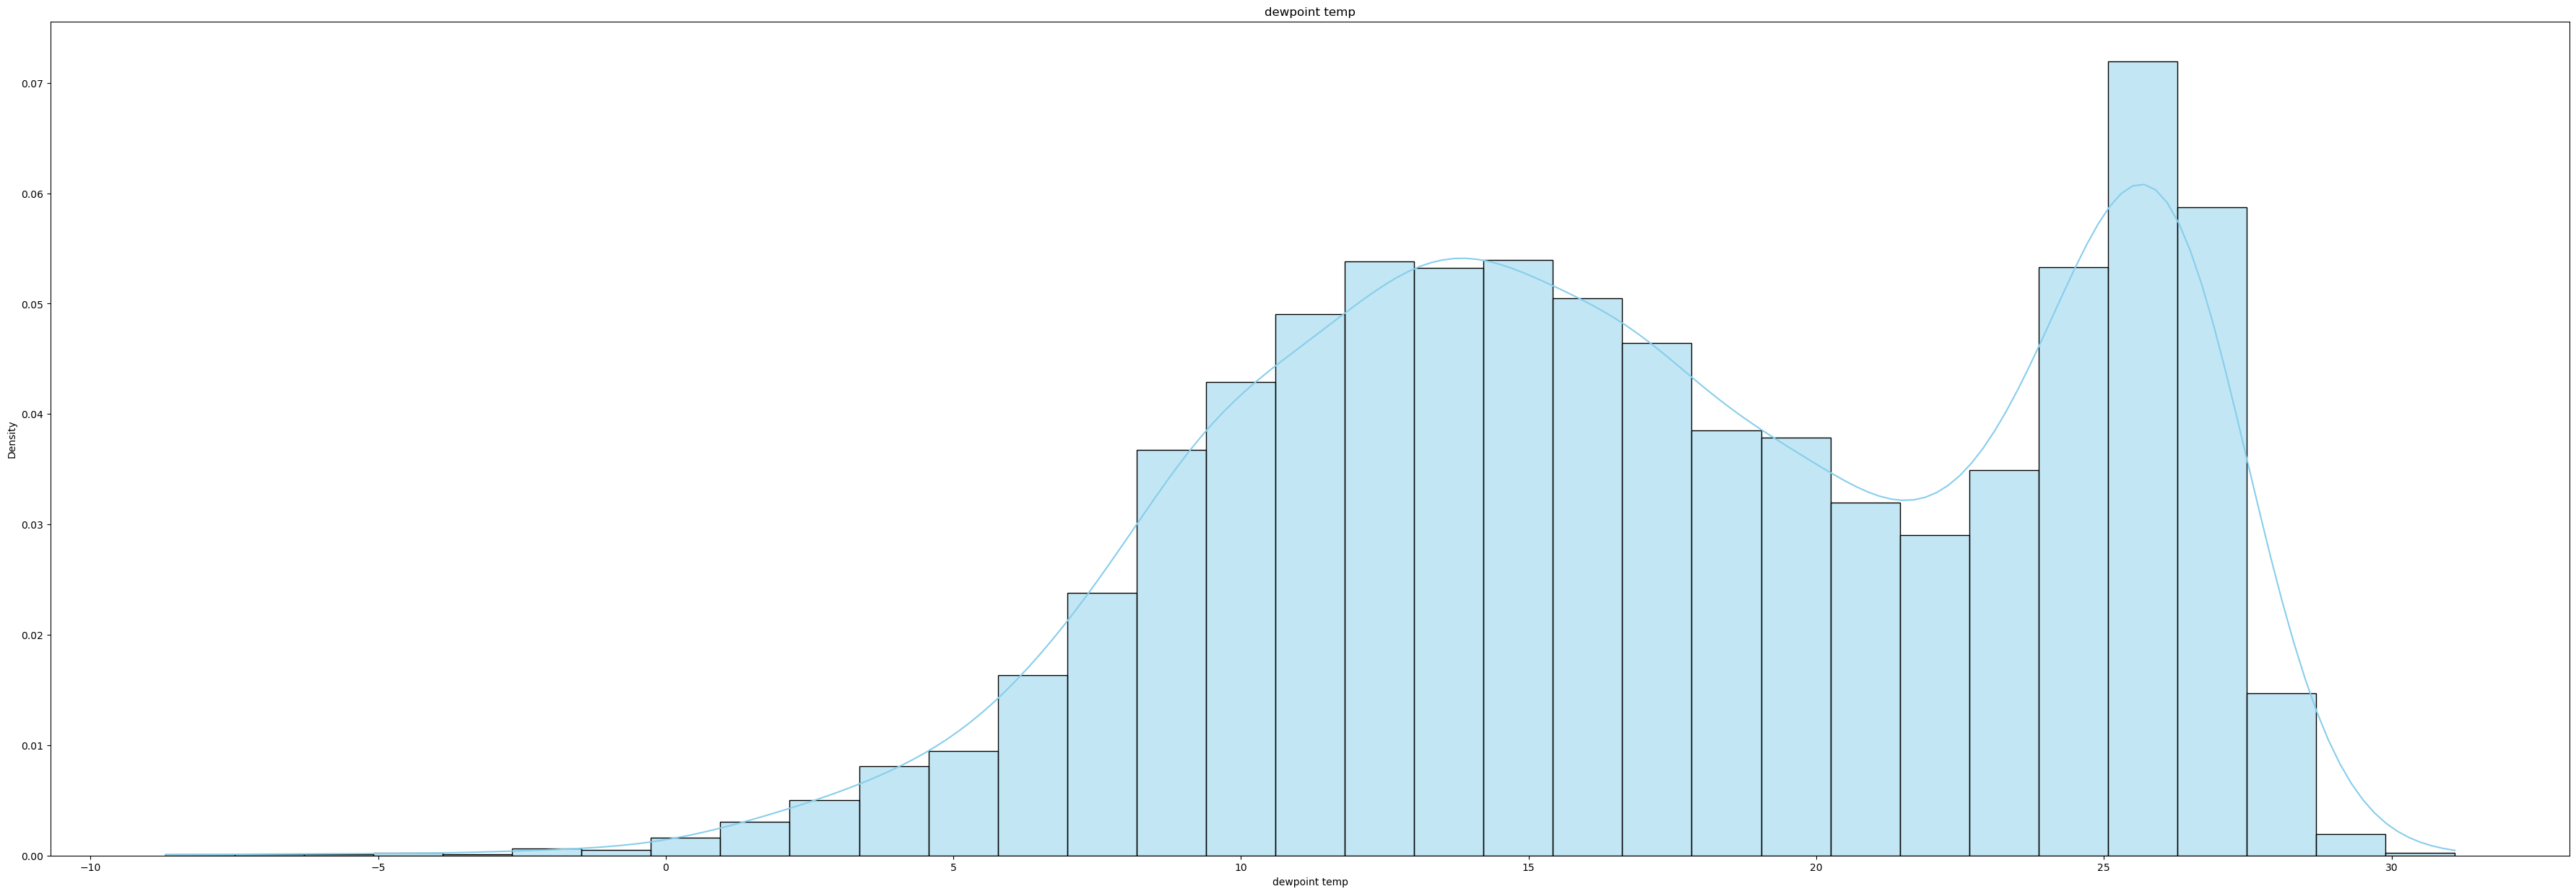

In [23]:
column_names = df.columns.tolist()
selected_columns = [col for col in column_names if col.lower() in ["Tmin","Tmax","wind speed", "visibility","humidity","pressure","dewpoint temp"]]

for feature in selected_columns:
    data = weather.copy()
    plt.figure(figsize=(45, 15))  # Set the figure size
    sns.histplot(data[feature], kde=True, color='skyblue', stat='density')
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title(feature)
    plt.show()

## Linear Regression

In [60]:
# Define the features and target
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = model.predict(X_test)

# Model evaluation
print("R2 Score:", metrics.r2_score(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))


R2 Score: 0.8707958433393149
Mean Squared Error: 6.752130741554898
Mean Absolute Error: 1.840064545504022


## Random Forest Regressor

In [51]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [26]:
# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the performance metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 6.838404734298537
Mean Absolute Error: 1.843616386425228
R2 Score: 0.8715282341340541


## Ridge Regression

In [52]:
rr = Ridge(alpha=.1)

In [53]:
predictors = df.columns[~df.columns.isin(["target"])]

In [54]:
predictors

Index(['Tmin', 'pressure', 'humidity', 'wind speed', 'Tmax', 'visibility',
       'dewpoint temp'],
      dtype='object')

In [55]:
def backtest(df, model, predictors, start=326, step=30):
    all_predictions = []
    
    for i in range(start, df.shape[0], step):
        train = df.iloc[:i,:]
        test = df.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [56]:
predictions = backtest(df, rr, predictors)

In [57]:
# calculating r2 score and mean square
print(mean_squared_error(predictions["actual"], predictions["prediction"]))
print(mean_absolute_error(predictions["actual"], predictions["prediction"]))
print(r2_score(predictions["actual"], predictions["prediction"]))

6.550758119874392
1.8379634459220697
0.874325449507001


In [33]:
weather_data = predictions.iloc[33:90,:]

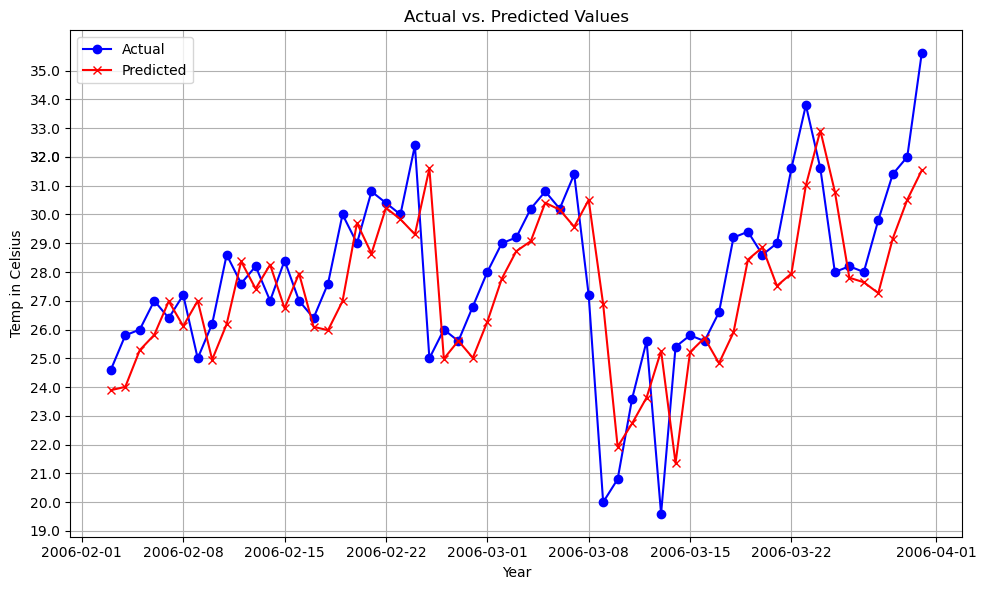

In [34]:
import matplotlib.pyplot as plt

actual_values_celsius = weather_data['actual']
predicted_values_celsius = weather_data['prediction']

plt.figure(figsize=(10, 6))
plt.title('Actual vs. Predicted Values')
plt.xlabel('Year')
plt.ylabel('Temp in Celsius')  

plt.plot(actual_values_celsius, label='Actual', color='blue', marker='o')

plt.plot(predicted_values_celsius, label='Predicted', color='red', marker='x')

plt.legend()

desired_y_ticks = [19,20,21,22,23,24,25,26,27,28,29,30,31,32,32,33,34,35]  # Add more values as needed
plt.yticks(desired_y_ticks)
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparative analysis of models for weather prediction

we successfully used to models such as linear regression, random forest, and rige regression to predict accurate weather prediction with visualization

#### we made accurate prediction and for testing we used 3 methods to test the accuracy of our models namely :
    1) Mean absolute error 
    2) Mean Squared error
    3) r2Score

### Accuracy of our Linear Regression Model
    R2 Score: 0.8707958433393149
    Mean Squared Error: 6.752130741554898
    Mean Absolute Error: 1.840064545504022

### Accuracy of our Random forest Model
    Mean Squared Error: 6.838404734298537
    Mean Absolute Error: 1.843616386425228
    R2 Score: 0.8715282341340541

### Accuracy of our Ridge Regression Model
    Mean Squared Error: 6.550758119874392
    Mean Absolute Error: 1.8379634459220697
    R2 Score: 0.874325449507001